In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('queue_log.csv')

In [2]:
df.columns = ['date','n']

def isint(s):
    try:
        result = int(s)
        return True
    except:
        return False

df = df[df['n'].apply(isint)]
df['n'] = df['n'].apply(lambda x: int(x))
df['date'] = df['date'].apply(pd.to_datetime)
df = df.set_index('date')

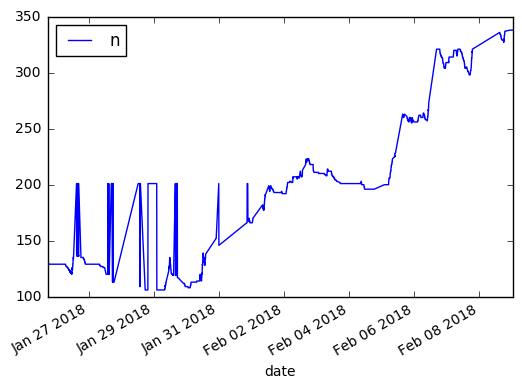

In [3]:
df.plot()
plt.show()

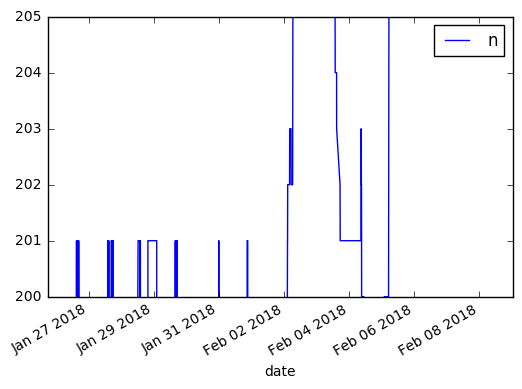

In [4]:
df.plot()
plt.ylim((200,205))
plt.show()

In [5]:
df = df.reset_index()
def filter_out_201_before_feb1(row):
    # picked up from timestamps 2018-.... in file names
    if (row[0]<pd.to_datetime('2/1/2018')) and (row[1]==201):
        return False
    else:
        return True

In [6]:
df = df[df.apply(filter_out_201_before_feb1, axis=1)]
df = df.set_index('date')

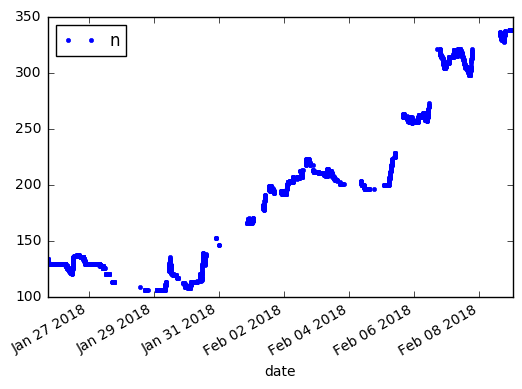

In [7]:
df.plot(style='.')
plt.show()

In [ ]:
for i in range(1,8):
    try:
        df[df.index.dayofweek==i].plot(style='.')
        plt.xlim(df.index[0],df.index[-1])
    except:
        pass
plt.show()